In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Natural Language Programming

In [ ]:
!pip3 install pandas_profiling
!pip3 install pycaret[full]

     |████████████████████████████████| 296 kB 5.1 MB/s 
     |████████████████████████████████| 123 kB 58.0 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


     |████████████████████████████████| 266 kB 4.9 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 6.8 MB 50.0 MB/s 
     |████████████████████████████████| 261 kB 46.4 MB/s 
     |████████████████████████████████| 2.0 MB 43.0 MB/s 
     |████████████████████████████████| 1.7 MB 60.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 65.4 MB/s 
     |████████████████████████████████| 111 kB 67.8 MB/s 
     |████████████████████████████████| 14.6 MB 31.4 MB/s 
     |████████████████████████████████| 1.3 MB 64.0 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 167 kB 42.9 MB/s 
     |████████████████████████████████| 101 kB 7.6 MB/s 
     |████████████████████████████████| 356 kB 67.5 MB/s 
     |██████████████████

### Natural Language Programming

In [ ]:
import os
import pandas as pd
from pathlib import Path

In [ ]:
# Load the news file RedditNews.csv
# Setup data path
data_path = Path('/content/drive/My Drive/pcml_data/6USML')
news = pd.read_csv(data_path /'RedditNews.csv')

In [ ]:
# Check the data
from pandas_profiling import ProfileReport

news.profile_report(minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Pycaret NLP module helps us with the troublesome
# pre-processing including stopwords, lemmatization and transformation
# Some of these are not necessary, so I will demonstrate the codes that does
# not require such a long processing time with pycaret

# Note that Pycaret is very efficient and effective for SML problems and some 
# types of USML problems.

# Warning: NLP usually takes very long to complete!
# Additional Note: Today's NLP problems are mostly solved using Deep Learning, 
# and not the traditional ML methods anymore
from pycaret.nlp import *

nlp = setup(news, target='News')

Description,Value
session_id,1848
Documents,73608
Vocab Size,21464
Custom Stopwords,False


In [ ]:
# Because the preprocessing takes so long, we save
# the config so that we can load it instead of going
# through the processing again

# The important variables are:
# text, data_, corpus, id2word, seed, target_
text = get_config('text')
data_ = get_config('data_')
corpus = get_config('corpus')
id2word = get_config('id2word')
seed = get_config('seed')
target_ = get_config('target_')

In [ ]:
# Create names and collect into a dictionary
import pickle

data_payload = {
    'text': text, 
    'data_': data_, 
    'corpus': corpus, 
    'id2word': id2word, 
    'seed': seed, 
    'target_': target_
}

In [ ]:
# Save objects to disk
for k, v in data_payload.items:
    with open(data_path / f'reddit_news/{k}', 'wb') as input:
        pickle.dump(v, input)

In [ ]:
# We can load the processed data from disk

from pycaret.nlp import *

# Create an empty setup
nlp = setup(pd.DataFrame([{'News': None}]), target='News')

# Push all saved config into created setup
import pickle

data_list = ['text', 'data_', 'corpus', 'id2word', 'seed', 'target_']

for k in data_list:
    with open(data_path / f'reddit_news/{k}', 'rb') as output:
        vars()[k] = pickle.load(output)

data_payload = {
    'text': text, 
    'data_': data_, 
    'corpus': corpus, 
    'id2word': id2word, 
    'seed': seed, 
    'target_': target_
}

for k, v in data_payload.items():
    set_config(k, v)

Description,Value
session_id,7233
Documents,1
Vocab Size,1
Custom Stopwords,False


Next step: Train the model (usually I'll pick LDA or NMF for topic modeling)

In [ ]:
lda = create_model('lda', num_topics=10, multi_core=True)

In [ ]:
nmf = create_model('nmf', num_topics=10)

In [ ]:
# Assign each news to the learned cluster
assigned = assign_model(lda)
assigned

,Date,News,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Dominant_Topic,Perc_Dominant_Topic
0,2016-07-01,finally receive birth_certificate die hour lat...,0.009092,0.009091,0.469033,0.111103,0.009094,0.009091,0.201571,0.163741,0.009091,0.009093,Topic 2,0.47
1,2016-07-01,back athens permanent host,0.020000,0.020000,0.819992,0.020000,0.020004,0.020000,0.020000,0.020002,0.020000,0.020002,Topic 2,0.82
2,2016-07-01,say,0.050007,0.050002,0.050015,0.050016,0.050008,0.050007,0.050002,0.549924,0.050003,0.050017,Topic 7,0.55
3,2016-07-01,british must give police hour notice sex threa...,0.005882,0.594409,0.005883,0.140354,0.005883,0.005882,0.005883,0.224056,0.005885,0.005883,Topic 1,0.59
4,2016-07-01,urge greenpeace stop oppose gmo,0.016667,0.016667,0.016667,0.376269,0.016667,0.016667,0.016667,0.490395,0.016667,0.016667,Topic 7,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73603,2008-06-08,go nearby dead injure,0.020000,0.020000,0.020002,0.020000,0.020010,0.020000,0.020000,0.619989,0.020000,0.220000,Topic 7,0.62
73604,2008-06-08,heterosexual admit,0.033333,0.033333,0.033333,0.033333,0.366666,0.033333,0.033333,0.033340,0.033337,0.366657,Topic 4,0.37
73605,2008-06-08,dangerous identity crisis,0.025000,0.025000,0.025000,0.275000,0.275000,0.275000,0.025000,0.025000,0.025000,0.025000,Topic 4,0.28
73606,2008-06-08,identity card could use spy people new child d...,0.102571,0.132812,0.005000,0.253069,0.243378,0.072472,0.057500,0.123196,0.005001,0.005000,Topic 3,0.25


In [ ]:
# Save the assigned dataset
assigned.to_csv(data_path / 'reddit_news_assigned.csv', index=False)

Next step: We check the documents in each label and guess what the themes are.

In [ ]:
# To read the assigned dataset
assigned = pd.read_csv(data_path / 'reddit_news_assigned.csv')

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 1']['News'].index]['News']

3        British Man Who Must Give Police 24 Hours' Not...
5        Brazil: Huge spike in number of police killing...
23       A Hindu temple worker has been killed by three...
31       Puerto Rico will default on $1 billion of debt...
41       Mounting evidence suggests 'hobbits' were wipe...
                               ...                        
73581    b'Chvez to FARC: Asks to end armed strugle, "T...
73591    b'Albinos, Long Shunned, Face Threat in Tanzan...
73592    b'Town in Britain Plans to Start its Own Curre...
73600    b'Cameras designed to detect terrorist facial ...
73601    b'Israeli peace activists protest 41 years of ...
Name: News, Length: 6046, dtype: object

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 3']['News'].index]['News']

6        Austria's highest court annuls presidential el...
12       Taiwanese warship accidentally fires missile t...
17       India gets $1 billion loan from World Bank for...
20       Philippines president Rodrigo Duterte urges pe...
27       Boris Johnson says he will not run for Tory pa...
                               ...                        
73588    b'Chiapas: army occupies Zapatista communities...
73594    b'Lebanese women still vulnerable to violence:...
73597    b'Citizens fighting Blackwater Potrero. Was th...
73599    b"Oil reserves 'will last decades' - a BBC Sco...
73606    b"UK: Identity cards 'could be used to spy on ...
Name: News, Length: 8718, dtype: object

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 4']['News'].index]['News']

24       Ozone layer hole seems to be healing - US &amp...
36       Cannabis compounds could treat Alzheimer's by ...
40       Googles free wifi at Indian railway stations i...
48       UEFA says no minutes of silence for Istanbul v...
52       UK must accept freedom of movement to access E...
                               ...                        
73538    b'Thousands of UK homeowners face negative equ...
73553    b'Corruption in Ukraine allows epidemic to rea...
73567    b'Chew Qat: In Yemen, 72 per cent of men and 3...
73604    b'Threat of world AIDS pandemic among heterose...
73605    b'Angst in Ankara: Turkey Steers into a Danger...
Name: News, Length: 7226, dtype: object

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 5']['News'].index]['News']

7        Facebook wins privacy case, can track any Belg...
16       S&amp;P revises European Union credit rating t...
18       U.S. sailors detained by Iran spoke too much u...
26       Stephen Hawking says pollution and 'stupidity'...
28       Six gay men in Ivory Coast were abused and for...
                               ...                        
73512    b'Grocery refuses to sell Jack Daniels barbecu...
73517    b"Cuba's City Gardens Flourish and 70% Of Vege...
73536    b'Canadian HRC Tribunal forces pastor to publi...
73575    b'Jos Manuel Barroso bullies the Irish, saying...
73590    b'News is a contraband item in Pakistan now, a...
Name: News, Length: 5834, dtype: object

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 8']['News'].index]['News']

8        Switzerland denies Muslim girls citizenship af...
21       Spain arrests three Pakistanis accused of prom...
29       Switzerland denies citizenship to Muslim immig...
30       Palestinian terrorist stabs israeli teen girl ...
32       Republic of Ireland fans to be awarded medal f...
                               ...                        
73541            b'Man escapes North Korea after 33 years'
73556              b'Saddam tribe leader murdered in Iraq'
73578    b'Future of the United States of Europe in the...
73598    b"S. Korean protesters, police clash in beef r...
73607    b'Marriage, they said, was reduced to the stat...
Name: News, Length: 7350, dtype: object

In [ ]:
news.loc[assigned[assigned['Dominant_Topic'] == 'Topic 9']['News'].index]['News']

13       Iran celebrates American Human Rights Week, mo...
15       The United States has placed Myanmar, Uzbekist...
19       Mass fish kill in Vietnam solved as Taiwan ste...
34       US airstrikes kill at least 250 ISIS fighters ...
39       Groups urge U.N. to suspend Saudi Arabia from ...
                               ...                        
73474    b"'If you want to help Iran, don't attack' - i...
73501    b"Islamic Cleric Issues Fatwa Condemning Gambi...
73543                  b"Zimbabwe 'run by military junta'"
73586    b"Israeli minister: Israel will attack Iran if...
73587    b'Albino Killings in Tanzania. At least 19 alb...
Name: News, Length: 7301, dtype: object

### Non-negative Matrix Factorization

I now demonstrate the NMF technique on a wikipedia dataset.
> Our objective is to use NMF to transform a word-frequency data. We want to associate wikipedia titles to combinations of the texts.
>
> Note that previous use-cases deal with un-tagged clusters (which we have to figure out what the themes are). Wikipedia is like a dictionary, which makes it easier for us to decipher the themes of the collection of clusters under NMF.

Before we load the dataset, check your data folder and compare the 2 file sizes: wiki.csv vs wiki.parquet.

Notice that the parquet file is smaller than csv. In fact, that is not the only advantage: parquet file formats retains more information about the datatypes, save and load much faster than csv, and consumes less memory.

> To read more, click [here](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d).

Also, read about reducing dataset sizes before saving from [here](https://https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e). 
>**This is essential to Data Scientists/Analysts who are working with large amounts of data. The time, space, and memory saved is non-trivial, so don't neglect this!**

#### Prepare the dataset
First, we load the parquet file wiki.parquet.

Pandas have a suite of functions that can read from most major file formats.

In [ ]:
wiki = pd.read_parquet(data_path / 'wiki.parquet')

In [ ]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463819 entries, 0 to 463818
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   463819 non-null  object
 1   text    463819 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB


Processing all 463,819 documents will take very long.

For this demonstration, I will select 1% of the sample. You can try the full sample to build your own wiki topic engine!

In [ ]:
wiki_sample = wiki.iloc[::100]
wiki_sample.reset_index(drop=True, inplace=True)
wiki_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4639 entries, 0 to 4638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4639 non-null   object
 1   text    4639 non-null   object
dtypes: object(2)
memory usage: 72.6+ KB


In [ ]:
# Split the dataset into titles and documents
titles = wiki_sample.title
documents = wiki_sample.text

In [ ]:
titles.iloc[0]

' Research Design and Standards Organization'

In [ ]:
documents.iloc[0]

'The Research Design and Standards Organisation (RDSO) is an ISO 9001 research and development organisation under the Ministry of Railways of India, which functions as a technical adviser and consultant to the Railway Board, the Zonal Railways, the Railway Production Units, RITES and IRCON International in respect of design and standardisation of railway equipment and problems related to railway construction, operation and maintenance. History. To enforce standardisation and co-ordination between various railway systems in British India, the Indian Railway Conference Association (IRCA) was set up in 1903. It was followed by the establishment of the Central Standards Office (CSO) in 1930, for preparation of designs, standards and specifications. However, till independence in 1947, most of the designs and manufacture of railway equipments was entrusted to foreign consultants. After independence, a new organisation called Railway Testing and Research Centre (RTRC) was set up in 1952 at Lu

We need to do some data cleaning. Here, I demonstrate the following techniques:

1. Lowercase all texts.
2. Remove stop words.
3. Remove punctuations.
4. Remove words with a length of 1
5. Convert words into their root form (stemming).


In [ ]:
# We will use the NLTK language package
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

def clean_text(s):
    # Convert text to lowercase
    s = s.lower()

    # Remove stopwords
    # some nltk stopwords will not match words tokenized by nltk
    tokens = [t.strip() for t in s.split(' ') if t not in sw]
    
    # Tokenize the text again using nltk
    s = ' '.join(tokens)
    tokens = word_tokenize(s)

    # Remove punctuations
    to_remove = list(punctuation) + ["``", "''"]
    tokens = [token for token in tokens if token not in to_remove]

    # Remove tokens with length < 2
    tokens = [t for t in tokens if len(t) > 1]

    # Convert tokens into their stemmed form
    tokens = [ps.stem(t) for t in tokens]

    return ' '.join(tokens)

In [ ]:
# test the function
s = documents[5]

clean_text(s)

"pager wireless telecommun devic receiv display numer text messag receiv announc voic messag one-way pager receiv messag respons pager two-way pager also acknowledg repli to origin messag use intern transmitt pager oper part page system includ one fix transmitt or case respons pager two-way pager one base station well number pager carri mobil user system rang restaur system singl low-pow transmitt nationwid system thousand high-pow base station one first practic page servic launch 1950 physician new york citi area physician paid us 12 per month servic carri oz pager would receiv phone messag within 25 mi singl transmitt tower system manufactur reevesound compani oper telanswerphon 1960 john franci mitchel combin element motorola 's walki talki automobil radio technolog creat first transistor pager point page technolog continu advanc pager adopt continu expand earli 1990 howev mid-1990 cellular technolog becam cheaper wide avail advanc servic began displac page commerci product today pa

In [ ]:
import swifter

# Apply the function to documents
documents_cleaned = documents.swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/4639 [00:00<?, ?it/s]

#### Perform additional pre-processing

This dataset deals with natural language. Thus, the correct pre-processing technique is the tf-idf.

Look at the data layout, the rows are topics and the columns will be words. 
> This is similar to the stock dataset that we played with.
> 
> We can perform an additional normalization after tfidf.

In [ ]:
documents_cleaned

0       research design standard organis rdso iso 9001...
1       montori hugh born august 25 1990 american foot...
2       matura similar term matur maturita maturità ma...
3       northern exposur american televis seri ran cb ...
4       appeal novelti also call argumentum ad novitat...
                              ...                        
4634    mehmet cengiz öz jhengi oz born june 11 1960 a...
4635    deiti philippin mytholog god goddess diwata wo...
4636    protest christian came nepal primarili nepales...
4637    shri adhya katyani shakti peeth mandir popular...
4638    land current known egypt long involv popul his...
Name: text, Length: 4639, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

# Call an instance of tfidf
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents_cleaned)

# Normalize the sparse matrix
csr_mat_norm = normalize(csr_mat)

# Create a NMF instance and fit the model
nmf = NMF(n_components=10, random_state=42)
nmf.fit(csr_mat_norm)

# Use the trained model to transform the data
nmf_features = nmf.transform(csr_mat_norm)

In [ ]:
# Check the transformed features
nmf_features.shape

(4639, 10)

#### Explore the NMF features

In [ ]:
# Create a dataframe and set titles as the index
nmf_df = pd.DataFrame(nmf_features, index=titles)
nmf_df

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Research Design and Standards Organization,0.000000,0.000000,0.000000,0.000000,0.044600,0.019806,0.043565,0.021349,0.000000,0.027032
Montori Hughes,0.000000,0.000000,0.094097,0.007443,0.000000,0.081785,0.003145,0.000000,0.000000,0.000000
Matura,0.004109,0.000000,0.000000,0.000000,0.015700,0.067476,0.000000,0.007329,0.000000,0.000000
Northern Exposure,0.000000,0.000000,0.017593,0.091536,0.009380,0.016740,0.009957,0.029083,0.000667,0.006807
Appeal to novelty,0.015020,0.001738,0.000177,0.001973,0.022679,0.000000,0.000000,0.003410,0.000785,0.000000
...,...,...,...,...,...,...,...,...,...,...
Mehmet Oz,0.015258,0.001559,0.001135,0.041665,0.047846,0.063342,0.000000,0.001155,0.000000,0.018336
Deities of Philippine mythology,0.013217,0.002899,0.000000,0.012416,0.024185,0.000000,0.000000,0.048636,0.004054,0.000000
Christianity in Nepal,0.031180,0.002194,0.000000,0.000000,0.000000,0.000000,0.000000,0.035298,0.000000,0.003340


Each cluster is a theme. The weights associated with each cluster reflects its influence on the title.

In [ ]:
# Check theme 3 - These are all people.
nmf_df[nmf_df[3] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Kim Poirier,0.000000,0.016092,0.007350,0.279657,0.000000,0.000000,0.010410,0.000000,0.000000,0.000000
Rupert Penry-Jones,0.001568,0.000000,0.025498,0.159037,0.000000,0.008309,0.007817,0.007303,0.000000,0.017790
Linda Darnell,0.006438,0.000000,0.000000,0.158128,0.006669,0.000000,0.003732,0.006544,0.000000,0.000000
Alison King,0.005137,0.000000,0.046907,0.175188,0.000000,0.021731,0.000000,0.009600,0.000000,0.000000
Karen Black,0.000000,0.014173,0.000000,0.217540,0.000000,0.026394,0.005092,0.004891,0.000000,0.000000
Andrew Keir,0.005366,0.000000,0.011860,0.157479,0.006636,0.000000,0.002530,0.007648,0.000000,0.001167
13th Academy Awards,0.000000,0.001256,0.015416,0.158450,0.009098,0.006804,0.000000,0.000000,0.000000,0.000000
Joyce Jameson,0.000000,0.000000,0.000000,0.213291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
John Gregson,0.000000,0.000000,0.001151,0.153059,0.000000,0.007702,0.024460,0.031115,0.000000,0.000000


In [ ]:
# Check theme 6 - This relates to military.
nmf_df[nmf_df[6] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Baton Rouge Metropolitan Airport,0.000000,0.000000,0.002099,0.000000,0.000000,0.000459,0.187931,0.015521,0.000000,0.013183
Air Do,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162851,0.000000,0.000000,0.076541
Dallas Love Field,0.000000,0.000075,0.000276,0.003862,0.000000,0.014165,0.161364,0.002163,0.000000,0.015374
Semyon Krivoshein,0.022350,0.000000,0.000000,0.000000,0.000000,0.000000,0.178906,0.000724,0.000000,0.000000
Carrier Strike Group Five,0.000000,0.001505,0.009937,0.000000,0.000000,0.000000,0.161525,0.000000,0.000000,0.000000
Battle of Inchon,0.007090,0.000000,0.002483,0.000000,0.000000,0.000000,0.199779,0.031966,0.000000,0.000000
Military,0.013343,0.000000,0.000000,0.000000,0.038941,0.000000,0.211279,0.000000,0.000000,0.000000
182d Fighter Squadron,0.000000,0.000000,0.002935,0.000000,0.000000,0.003193,0.240702,0.000000,0.002317,0.000000
Commander Land Forces,0.007705,0.000000,0.000000,0.000000,0.000000,0.000000,0.188506,0.002612,0.000000,0.000000


In [ ]:
# Check theme 9 - These relates to banking and finance.
nmf_df[nmf_df[9] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Panic of 1857,0.018073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033922,0.000000,0.186285
National Bank of Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268889
Market discipline,0.001897,0.000000,0.000000,0.000000,0.029557,0.000000,0.000000,0.000000,0.000000,0.198648
Citigroup,0.004852,0.003252,0.009790,0.002264,0.000000,0.000000,0.000000,0.008562,0.000000,0.269454
Industrial loan company,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214094
Interbank lending market,0.000000,0.000000,0.000000,0.000000,0.012148,0.000000,0.000000,0.000000,0.000000,0.234198
Economy of Australia,0.032570,0.001422,0.009661,0.000000,0.000000,0.002306,0.000000,0.049898,0.000000,0.169620
Federal Reserve Bank of Richmond,0.000000,0.000000,0.000000,0.000000,0.000000,0.003579,0.000000,0.019670,0.000000,0.161186
HBOS,0.000000,0.003178,0.000635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183472


Observe the shape of the nmf components.

Each component is a weighted combination of each of the 85,147 unique words in the entire document collection.

tf-idf and normalization reduces the influence of commonly occuring words across documents. NMF fitted on the data will then select combination of words that give the best separations. This ends up as topics.

We validated the NMF approach with a sample of wikipedia articles which are already tagged with titles. Note that we only used 1% or less than 5000 articles from the wikipedia sample, and we got very impressive separation of topics!

In [ ]:
nmf.components_.shape

(10, 85147)

Observe the shape of the nmf features.

Each document is represented by a weighted combination of components, which is a separation of topics determined by combination of words.

Thus, NMF features combine topics into documents, while NMF components combine words into topics.

In [ ]:
nmf_features.shape

(4639, 10)

### Image recognition

What other big data use-cases do we often encounter that have the data structure of the above?

Note: Big data means complex data, not massive amounts of data.

Think about images. 
> An image is a collection of pixels (colored cells). 
>
> Look at your screen, the image that you are seeing is made up of at least 786,432 color dots (pixels). 
>
> Each dot is a color by itself. But because of how small and tightly packed they are on the screen (1024 pixels by 768 pixels), we see color gradients.

How do we represent an image with NMF data structures? 
> This is an important step in your data science training.
> 
> Models are generic and limited, but use-cases are limitless. By creatively thinking how we can represent real world problems in the basic structures of models, we create new powerful tools.
>
> This is the nature of intermediate to advanced algorithms. The basic structures are simple, easy to understand. Its the transformation that creates new powerful magic.

Recall that NMF components combine words to topics.
> Words are the smallest unit of data in NLP.
>
> Pixels are the smallest unit of data in images.
>
> Thus, we can use NMF components to combine pixels into recognizable parts of images. e.g. curve, lines, leading to eyes, mouth, leading to head etc.
>
> This approach is the same one adopted by the state-of-the-art deep learning method in image recognition: the Convolutional Neural Network (CNN).

Next, NMF features combine topics into documents.
> In the image use-case, each document is an image.
>
> Using NMF, we can give collections of image a weighted collection of components.

In this example, I demonstrate 

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

There are a couple of attributes in this object.

In [ ]:
# Labels
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Raw images
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [ ]:
# Flattened images
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
# Shape of each image
digits.images[0].shape

(8, 8)

3


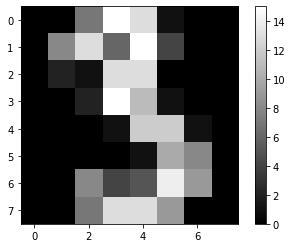

In [ ]:
import matplotlib.pyplot as plt

# Let's see how these images look like
sample_num = 3

print(digits.target[sample_num])

plt.imshow(digits.images[sample_num], cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

Learning to recognize digits with NMF.

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)

nmf_features = nmf.fit_transform(digits.data)

In [ ]:
# Check the association of each target tag with the NMF features
pd.DataFrame(nmf_features, index=digits.target)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.837977,0.310621,0.000000,0.175224,0.000000,0.000000,1.206642,0.420165
1,0.259267,1.208407,0.178539,0.480535,1.114150,0.208544,0.506102,0.065651,0.000000,0.000000
2,0.170187,0.795769,0.913005,1.164343,0.524838,0.000000,0.303879,0.572332,0.000000,0.000000
3,0.642375,0.000000,0.000000,0.036729,0.863251,0.000000,0.176717,0.462493,0.459937,0.150041
4,0.000000,0.583540,0.761737,0.000000,0.994689,0.000000,0.289829,0.000000,0.000000,0.530666
...,...,...,...,...,...,...,...,...,...,...
9,0.027756,0.000000,0.000000,0.640690,0.715832,0.608936,0.131584,0.346691,0.721436,0.566633
0,0.000000,0.493361,1.234742,0.487593,0.000000,0.227609,0.000000,0.112395,1.258477,0.487358
8,0.238120,0.786689,0.939308,0.474236,0.843952,0.000000,0.613849,0.081940,0.506697,0.057259
9,0.000000,0.000000,0.128867,0.445220,0.601895,0.435832,0.594886,0.364018,0.733775,0.552754


In [ ]:
# Check the components
nmf.components_.shape

(10, 64)

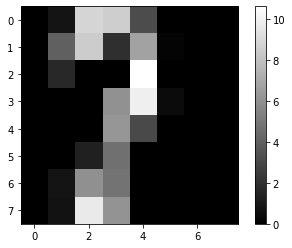

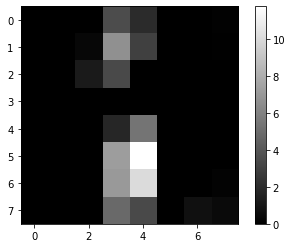

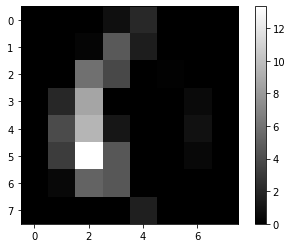

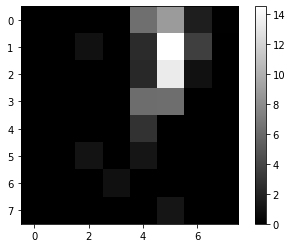

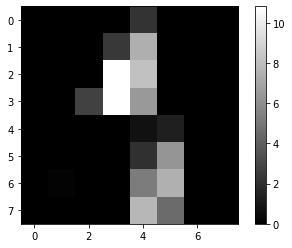

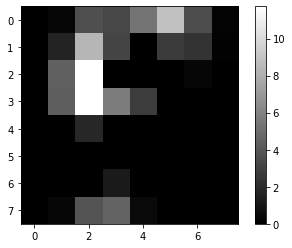

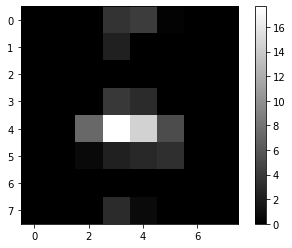

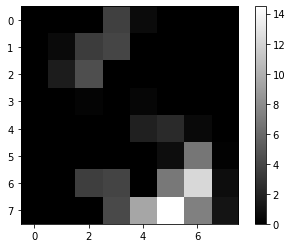

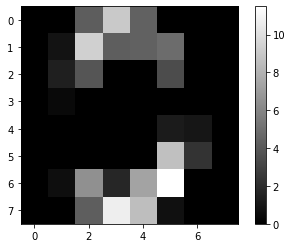

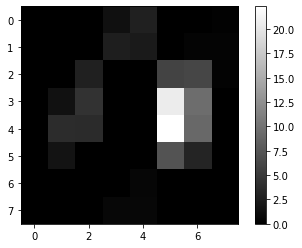

[0.         0.         0.83719469 0.31065541 0.         0.1754241
 0.         0.         1.20719036 0.42024808]


In [ ]:
for component in nmf.components_:
    img = component.reshape(8, 8)

    plt.figure()
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

print(nmf_features[0])

Change the number of components and you can observe how NMF extracts key features that determine how a digit is written.

To see this extraction more clearly, let's compare this to a PCA, which does not extract such parts.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca_features = pca.fit_transform(digits.data)

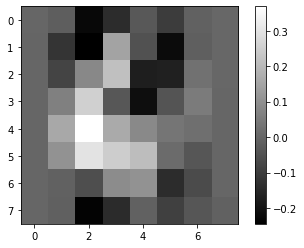

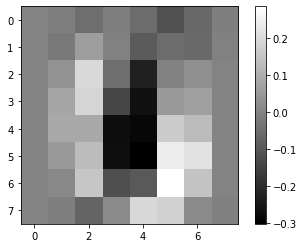

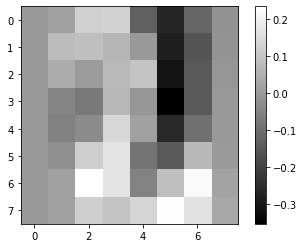

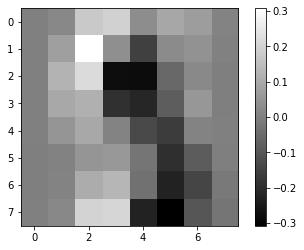

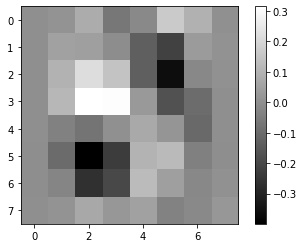

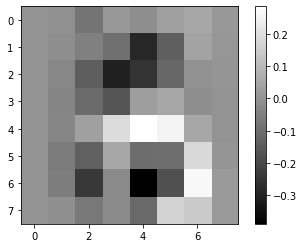

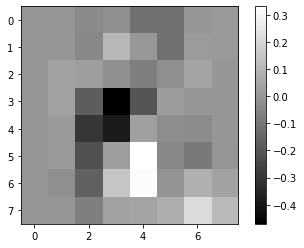

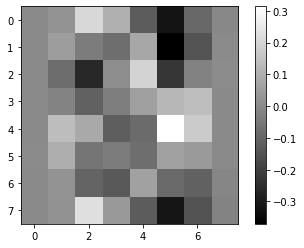

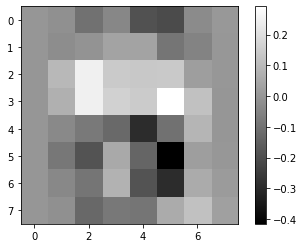

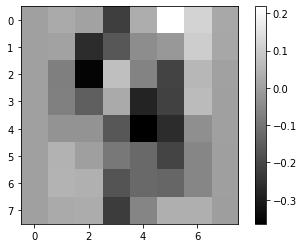

[-1.25937315 21.27479022 -9.46295763 13.01434905 -7.1271884  -7.44055365
  3.25673638  2.54337269 -0.60407232  3.65123516]


In [ ]:
for component in pca.components_:
    img = component.reshape(8, 8)

    plt.figure()
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

print(pca_features[0])

### How is the accuracy?
This is the result of the 8 x 8 digits (sample size 1797)

In [ ]:
digits_nmf = pd.DataFrame(nmf_features)
digits_nmf['target'] = digits.target
digits_nmf

,0,1,2,3,4,5,6,7,8,9,target
0,0.000000,0.000000,0.837694,0.311754,0.000000,0.174945,0.000000,0.000000,1.207347,0.420013,0
1,0.260248,1.210271,0.179248,0.480310,1.113702,0.208256,0.504835,0.065584,0.000000,0.000000,1
2,0.171029,0.796910,0.912895,1.164197,0.524986,0.000000,0.302281,0.572232,0.000000,0.000000,2
3,0.641090,0.000000,0.000000,0.036938,0.863298,0.000000,0.178115,0.461686,0.461582,0.149735,3
4,0.000000,0.585477,0.762224,0.000000,0.994055,0.000000,0.289195,0.000000,0.000000,0.530539,4
...,...,...,...,...,...,...,...,...,...,...,...
1792,0.027306,0.000000,0.000000,0.640991,0.716343,0.608852,0.132317,0.346637,0.721915,0.566712,9
1793,0.000000,0.492842,1.234540,0.488806,0.000000,0.227157,0.000000,0.112738,1.259508,0.486974,0
1794,0.238597,0.787797,0.939947,0.474593,0.843296,0.000000,0.613398,0.081982,0.506841,0.056980,8
1795,0.000000,0.000000,0.129558,0.445611,0.601856,0.435437,0.595743,0.364073,0.734081,0.552424,9


In [ ]:
from pycaret.classification import *

In [ ]:
digits_experiment = setup(
    data=digits_nmf,
    target='target',
    train_size=0.9,
    preprocess=False,
)

,Description,Value
0,session_id,3769
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1797, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Transformed Train Set,"(1617, 10)"
9,Transformed Test Set,"(180, 10)"


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9641,0.9985,0.9644,0.9661,0.9637,0.9601,0.9605,0.519
catboost,CatBoost Classifier,0.9586,0.9987,0.9586,0.9607,0.9582,0.9540,0.9543,21.449
knn,K Neighbors Classifier,0.9561,0.9932,0.9562,0.9583,0.9557,0.9512,0.9515,0.125
rf,Random Forest Classifier,0.9493,0.9979,0.9494,0.9528,0.9495,0.9437,0.9440,0.665
qda,Quadratic Discriminant Analysis,0.9437,0.9968,0.9440,0.9470,0.9435,0.9375,0.9379,0.027
lightgbm,Light Gradient Boosting Machine,0.9431,0.9981,0.9432,0.9472,0.9430,0.9368,0.9373,1.082
xgboost,Extreme Gradient Boosting,0.9400,0.9975,0.9398,0.9434,0.9397,0.9334,0.9338,4.829
gbc,Gradient Boosting Classifier,0.9264,0.9973,0.9267,0.9312,0.9264,0.9182,0.9188,3.886
lr,Logistic Regression,0.9078,0.9930,0.9078,0.9125,0.9071,0.8976,0.8982,0.567
lda,Linear Discriminant Analysis,0.8955,0.9911,0.8954,0.9014,0.8949,0.8838,0.8846,0.024


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3769, verbose=0,
                     warm_start=False)

For comparison purposes, the following is the same dataset that I am using to demonstrate deep learning in USML notebook 4 and 5.

In [ ]:
from torch.utils.data import random_split
from torchvision import datasets, transforms

dataset = datasets.MNIST('data', download=True, train=True)

In [ ]:
# Check the shape of the data
dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
# Flatten the data
dataset.data.view(60000, 28 * 28)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=20)  # This dataset has more features, so i use double the components.

nmf_features = nmf.fit_transform(dataset.data.view(60000, 28 * 28).numpy())

/usr/local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [ ]:
nmf_features

array([[0.        , 0.        , 0.51479666, ..., 0.61751653, 1.49008532,
        0.        ],
       [0.00986449, 3.1995768 , 0.63808389, ..., 0.        , 1.91803231,
        0.21498109],
       [0.        , 0.33075318, 0.        , ..., 0.52138487, 0.35720557,
        0.91042161],
       ...,
       [0.        , 0.        , 0.88995207, ..., 0.04226645, 1.28734293,
        0.        ],
       [0.        , 1.58849703, 0.        , ..., 0.        , 0.73980452,
        0.63679498],
       [0.        , 0.5104518 , 0.        , ..., 0.        , 1.103015  ,
        0.70445194]])

In [ ]:
digits_full_nmf = pd.DataFrame(nmf_features)
digits_full_nmf['target'] = dataset.targets
digits_full_nmf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,0.000000,0.000000,0.514797,2.184933,1.290397,1.309509,0.000000,0.637345,1.536915,0.721775,0.000000,0.314547,1.534299,0.092134,0.414511,0.000000,0.345225,0.617517,1.490085,0.000000,5
1,0.009864,3.199577,0.638084,0.542345,1.608337,1.698626,0.000000,0.000000,0.140849,1.182763,0.293984,0.199410,1.403784,0.000000,1.076601,1.403454,0.000000,0.000000,1.918032,0.214981,0
2,0.000000,0.330753,0.000000,0.000000,0.000000,0.000000,0.000000,0.981332,0.916990,1.237854,1.991400,0.000000,0.000000,0.334997,0.000000,0.000000,0.000000,0.521385,0.357206,0.910422,4
3,1.718647,0.000000,0.000000,0.000000,0.000000,0.000000,3.188468,0.192988,0.000000,0.000000,0.000000,1.121791,1.086599,0.000000,0.000000,0.000000,0.000000,0.000000,1.420641,0.000000,1
4,2.270427,0.516697,3.252113,0.677628,0.000000,0.191426,0.000000,1.100467,0.000000,0.000000,0.240065,0.022029,0.219785,0.000000,0.000000,1.639177,1.186357,0.000000,0.000000,1.057042,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.758891,0.000000,1.042290,1.464062,0.129074,0.647193,1.124467,0.976588,0.368707,0.000000,1.253915,0.373229,0.000000,0.000000,1.368216,0.000000,0.143404,0.000000,1.869977,0.766319,8
59996,1.026544,0.000000,0.000000,0.521308,0.321501,0.000000,0.000000,1.424433,1.404077,0.000000,1.387030,0.581932,0.000000,0.000000,3.251171,0.000000,0.000000,0.000000,2.223229,0.000000,3
59997,0.000000,0.000000,0.889952,1.409177,0.000000,2.740002,0.000000,1.045059,1.929345,0.000000,0.000000,0.000000,0.708398,0.000000,0.161615,0.638469,0.000000,0.042266,1.287343,0.000000,5
59998,0.000000,1.588497,0.000000,0.000000,1.797688,2.891730,0.000000,0.000000,0.211818,1.386561,0.000000,0.000000,0.258948,0.000000,0.000000,0.097101,1.088246,0.000000,0.739805,0.636795,6


In [ ]:
from pycaret.classification import *

digits_full_experiment = setup(
    data=digits_full_nmf,
    target='target',
    train_size=0.9,
    preprocess=False,
    use_gpu=True,
    silent=True,
)

,Description,Value
0,session_id,8912
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(60000, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Transformed Train Set,"(54000, 20)"
9,Transformed Test Set,"(6000, 20)"


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9666,0.9991,0.9663,0.9666,0.9666,0.9628,0.9628,13.647
xgboost,Extreme Gradient Boosting,0.9595,0.9987,0.9592,0.9596,0.9595,0.9550,0.9550,8.004
lightgbm,Light Gradient Boosting Machine,0.9563,0.9985,0.9559,0.9564,0.9563,0.9514,0.9514,4.751
rf,Random Forest Classifier,0.9438,0.9974,0.9432,0.9438,0.9438,0.9375,0.9375,1.910
knn,K Neighbors Classifier,0.9399,0.9900,0.9392,0.9399,0.9397,0.9332,0.9332,0.466
gbc,Gradient Boosting Classifier,0.9228,0.9955,0.9221,0.9229,0.9227,0.9142,0.9142,243.080
qda,Quadratic Discriminant Analysis,0.9125,0.9926,0.9118,0.9132,0.9126,0.9027,0.9028,0.137
lr,Logistic Regression,0.8656,0.9864,0.8636,0.8651,0.8652,0.8506,0.8507,0.700
dt,Decision Tree Classifier,0.8553,0.9197,0.8534,0.8556,0.8554,0.8392,0.8392,1.299
lda,Linear Discriminant Analysis,0.8206,0.9796,0.8182,0.8246,0.8206,0.8006,0.8010,0.223


### Here's the codes to install rapids.ai in case you want to execute the long-running codes in GPU.

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell first.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 286 (delta 64), reused 39 (delta 21), pack-reused 171
Receiving objects: 100% (286/286), 83.01 KiB | 5.93 MiB/s, done.
Resolving deltas: 100% (126/126), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.
# Don't run the next cell until you see the session restarts.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Ign:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Err:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Release
  404  Not Found [IP: 52.84.162.97 443]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  
# Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:25
🔁 Restarting kernel...


In [ ]:
# Installing RAPIDS
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.08
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.08


The following packages will be downloaded:

    package                

In [ ]:
# Install the additional packages
!pip3 install pycaret[full]
!pip3 install pandas-profiling
!pip3 install shap
!pip3 install pyarrow

# install lightgbm GPU
!pip3 install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

     |████████████████████████████████| 266 kB 8.0 MB/s 
     |████████████████████████████████| 292 kB 77.0 MB/s 
     |████████████████████████████████| 6.8 MB 69.2 MB/s 
     |████████████████████████████████| 23.9 MB 1.1 MB/s 
     |████████████████████████████████| 271 kB 92.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.1 MB/s 
     |████████████████████████████████| 636 kB 71.4 MB/s 
     |████████████████████████████████| 167 kB 62.8 MB/s 
     |████████████████████████████████| 10.4 MB 40.1 MB/s 
     |████████████████████████████████| 1.7 MB 91.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 74.4 MB/s 
     |████████████████████████████████| 1.5 MB 88.2 MB/s 
     |████████████████████████████████| 24.2 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 79.8 MB/s 
     |█████████████

/usr/local/lib/python3.7/site-packages/pip/_internal/commands/install.py:230: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
